 ## 1. Условие задачи

### 1.1. Вводные данные: 
Дана динамика покупки пользователями платных подписок в мобильном приложении с марта по октябрь 2018 года. 1 октября 2018 года вышла новая версия приложения. С 10.10.18 по 12.10.18 пользователи могли оформить подписку со скидкой. 

Задача: 
Необходимо проанализировать рост выручки. Результат оформить в виде краткого отчета с визуализацией данных.

### 1.2. Задача: 
Необходимо проанализировать рост выручки. Результат оформить в виде краткого отчета с визуализацией данных.

## 2. Подготовка данных

### 2.1. Подгружаем библиотеки, которые будем использовать в процессе работы.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### 2.2. Выгружаем данные из файла и смотрим на них

In [103]:
data_for_task_1 = pd.read_csv('data/Data_Analyst_1.csv', sep = ';')
data_for_task_1.head()

,Date,Revenue ($)
0,01.03.2018,7878261.0
1,02.03.2018,7995176.0
2,03.03.2018,9887822.0
3,04.03.2018,10067265.0
4,05.03.2018,9018922.0


In [104]:
data_for_task_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         245 non-null    object 
 1   Revenue ($)  245 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [105]:
data_for_task_1.describe()

,Revenue ($)
count,2.450000e+02
mean,7.158634e+06
std,1.519511e+06
min,1.978644e+06
25%,6.153417e+06
50%,6.827791e+06
75%,8.034122e+06
max,1.524611e+07


In [106]:
data_for_task_1['Revenue ($)']

0       7878261.0
1       7995176.0
2       9887822.0
3      10067265.0
4       9018922.0
          ...    
241     6911239.0
242     6971250.0
243     6870345.0
244     7780850.0
245           NaN
Name: Revenue ($), Length: 246, dtype: float64

In [107]:
data_for_task_1

,Date,Revenue ($)
0,01.03.2018,7878261.0
1,02.03.2018,7995176.0
2,03.03.2018,9887822.0
3,04.03.2018,10067265.0
4,05.03.2018,9018922.0
...,...,...
241,28.10.2018,6911239.0
242,29.10.2018,6971250.0
243,30.10.2018,6870345.0
244,31.10.2018,7780850.0


In [108]:
data_for_task_1.fillna(0)

,Date,Revenue ($)
0,01.03.2018,7878261.0
1,02.03.2018,7995176.0
2,03.03.2018,9887822.0
3,04.03.2018,10067265.0
4,05.03.2018,9018922.0
...,...,...
241,28.10.2018,6911239.0
242,29.10.2018,6971250.0
243,30.10.2018,6870345.0
244,31.10.2018,7780850.0


In [109]:
min(data_for_task_1['Revenue ($)'])

1978644.0

In [110]:
max(data_for_task_1['Revenue ($)'])

15246113.0

In [111]:
data_for_task_1.dtypes

Date            object
Revenue ($)    float64
dtype: object

### 2.3. Приводим данные о дате к нужному формату

In [112]:
data_for_task_1['Date'] = pd.to_datetime(data_for_task_1['Date'], format='%d.%m.%Y')
data_for_task_1['Date'][0].month

3

In [113]:
data_for_task_1['Date']

0     2018-03-01
1     2018-03-02
2     2018-03-03
3     2018-03-04
4     2018-03-05
         ...    
241   2018-10-28
242   2018-10-29
243   2018-10-30
244   2018-10-31
245          NaT
Name: Date, Length: 246, dtype: datetime64[ns]

In [114]:
# Теперь у даты формат datetime64
data_for_task_1.dtypes

Date           datetime64[ns]
Revenue ($)           float64
dtype: object

In [115]:
data_for_task_1.shape

(246, 2)

## 3. Предварительная визуализация

### 3.1. Визуализируем данные, чтобы увидеть общую картину

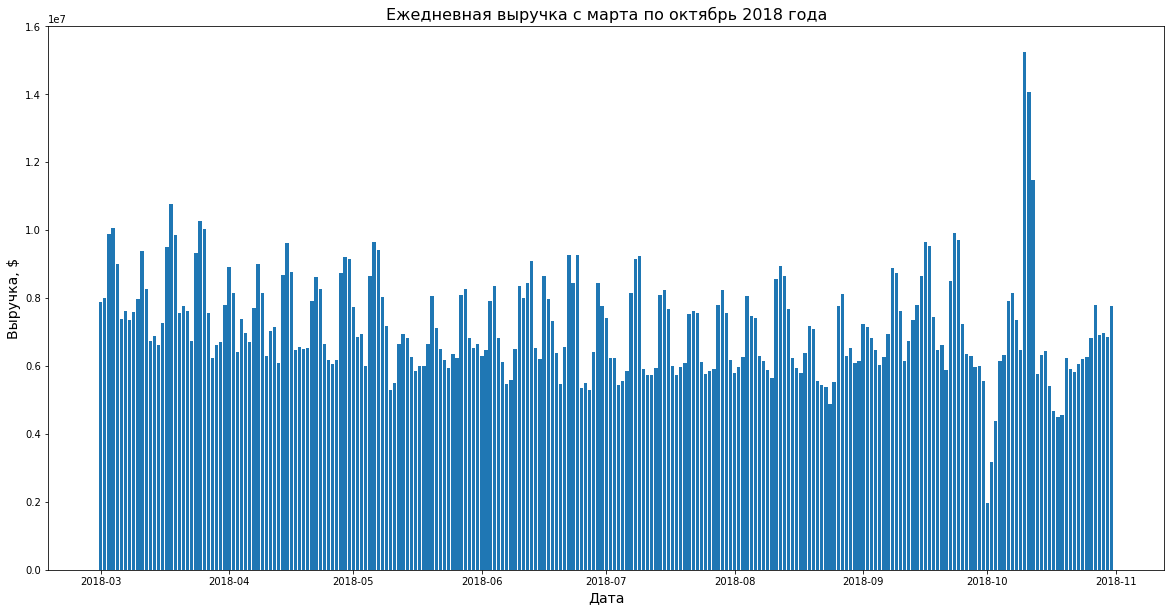

In [180]:
plt.subplots(figsize=(20, 10))
plt.bar(data_for_task_1['Date'], data_for_task_1['Revenue ($)'])
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка, $', fontsize=14)
plt.title('Ежедневная выручка с марта по октябрь 2018 года', fontsize=16)
plt.show()

### 3.2. Ищем даты, когда был рекорд по выручке.
Как видим в октябре у нас случилось увеличение выручки. Скорее всего это было связано со скидкой. Но нужно проверить те ли это даты.

In [182]:
sorted(data_for_task_1['Revenue ($)'], reverse=True)[:5]

[15246113.0, 14057614.0, 11473092.0, 10760312.0, 10271207.0]

Проверим, в каких датах зафиксировали три рекордных значения выручки. Для этого отберем даты, когда выручка была больше 10,8 млн.

In [118]:
for i in range(len(data_for_task_1['Date'])):
    if data_for_task_1['Revenue ($)'][i] > 10800000:
        print(data_for_task_1['Date'][i])

2018-10-10 00:00:00
2018-10-11 00:00:00
2018-10-12 00:00:00


Да, это оказались даты продаж со скидкой. 
Тогда посмотрим, как же продается приложение в другие дни.

## 4. Определение выручки за день

## 4.1. Выручка в разрезе месяца

In [142]:
# Создадим словарь с номерами месяцев.
revenue = {y: 0 for y in range(3,11)}
revenue

{3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [143]:
# Заполним его данными по выручке в разрезе месяца
for key, value in revenue.items():
    for i in range(len(data_for_task_1['Date'])):
        if key == data_for_task_1['Date'][i].month:
            value += data_for_task_1['Revenue ($)'][i]
        revenue.update({key: value})

In [144]:
# Покажем наш словарь с данными по выручке в разразе месяца
revenue

{3: 252387296.0,
 4: 226048620.0,
 5: 215189204.0,
 6: 214310419.0,
 7: 210591514.0,
 8: 205150348.0,
 9: 220116347.0,
 10: 210071590.0}

### 4.2. Количество дней в месяцах

In [145]:
# Создадим словарь с номерами месяцев.
day_in_month = {y: 0 for y in range(3,11)}
day_in_month

{3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [146]:
# Заполним его данными по дням в разрезе месяца
for key, value in day_in_month.items():
    for i in range(len(data_for_task_1['Date'])):
        if key == data_for_task_1['Date'][i].month:
            value = data_for_task_1['Date'][i].daysinmonth
        day_in_month.update({key: value})

In [147]:
# Покажем наш словарь с данными по дням в разразе месяца
day_in_month

{3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31}

### 4.3. Выручка за день в разрезе месяца

In [148]:
# Создадим словарь с номерами месяцев.
revenue_per_day = {y: 0 for y in range(3,11)}
revenue_per_day

{3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [149]:
# Заполним его данными на основе предидущих словарей
for key, value in revenue_per_day.items():
    if key in revenue and key in day_in_month:
        value = revenue[key] / day_in_month[key]
    revenue_per_day.update({key: int(value)})

In [150]:
# Покажем наш словарь с данными по выручке за день в разразе месяца
revenue_per_day

{3: 8141525,
 4: 7534954,
 5: 6941587,
 6: 7143680,
 7: 6793274,
 8: 6617753,
 9: 7337211,
 10: 6776502}

## 5. Корректировка с учетом дней продажи со скидкой

### 5.1. Визуализация ежедневной выручки в разрезе месяцев

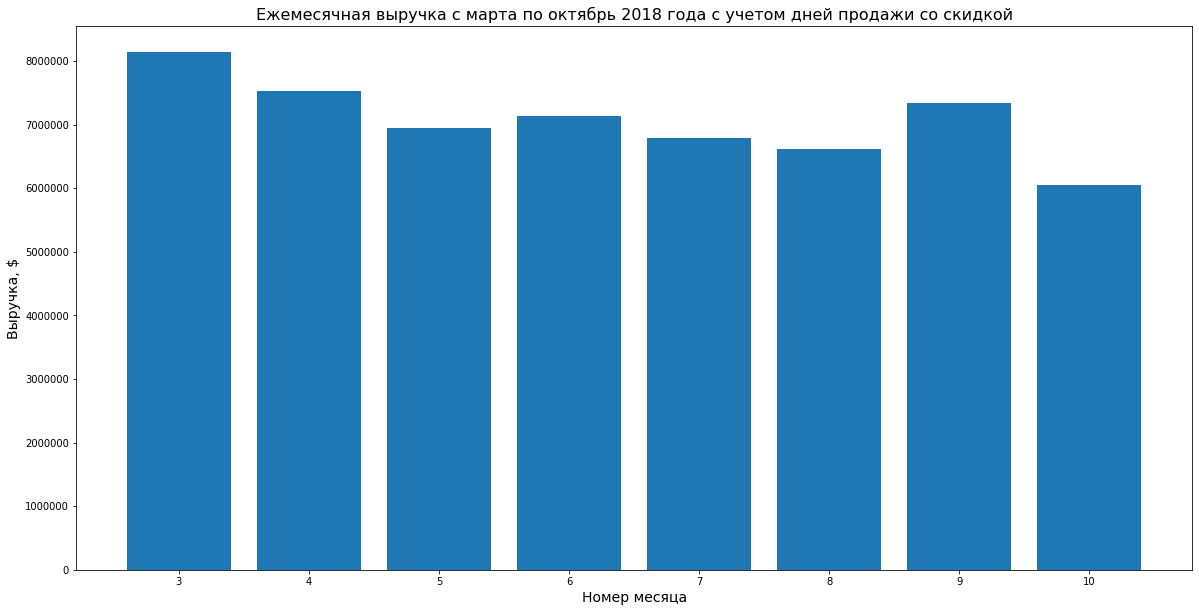

In [177]:
plt.subplots(figsize=(20, 10))
plt.bar(revenue_per_day.keys(), revenue_per_day.values())
plt.xlabel('Номер месяца', fontsize=14)
plt.ylabel('Выручка, $', fontsize=14)
plt.title('Ежемесячная выручка с марта по октябрь 2018 года с учетом дней продажи со скидкой', fontsize=16)
plt.show()

Но в этом графике также есть данные о продажах со скидкой. Давайте уберем их.

## 5.2. Корректировка графика с учетом дней продаж со скидкой.

In [152]:
# Вычислям общую суму продаж со скидкой.
revenue_with_discount = 0

for i in range(len(data_for_task_1['Date'])):
    if data_for_task_1['Date'][i].month == 10:
        if data_for_task_1['Date'][i].day > 9 and data_for_task_1['Date'][i].day < 13:
            revenue_with_discount += data_for_task_1['Revenue ($)'][i]
            
revenue_with_discount

40776819.0

In [153]:
# Вычисляем общую суму продаж в октябре без скидки.
revenue[10] = int(revenue[10] - revenue_with_discount)
revenue[10]

169294771

In [154]:
# Вычислям дневную выручку в октябре, когда подписка продавалась по скидке.
revenue_per_day[10] = int(revenue[10] / (day_in_month[10] - 3))
revenue_per_day[10]

6046241

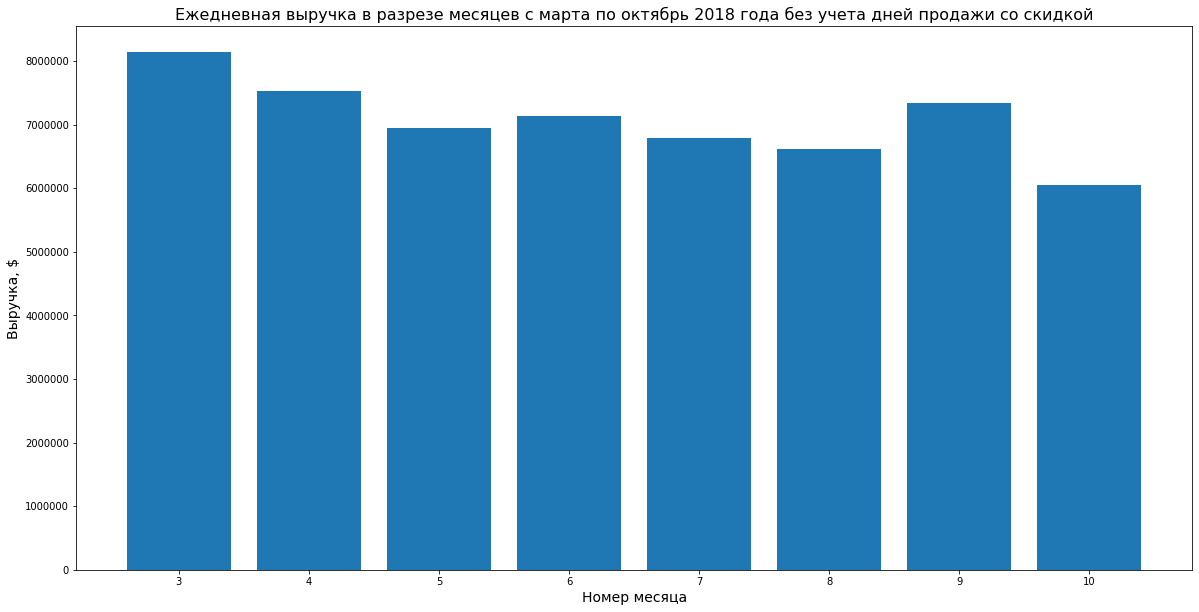

In [183]:
# Строим график выручки помесячно без учета продаж по скидке.
plt.subplots(figsize=(20, 10))
plt.bar(revenue_per_day.keys(), revenue_per_day.values())
plt.xlabel('Номер месяца', fontsize=14)
plt.ylabel('Выручка, $', fontsize=14)
plt.title('Ежедневная выручка в разрезе месяцев с марта по октябрь 2018 года без учета дней продажи со скидкой', fontsize=16)
plt.show()

Таким образом, мы видим, что хоть продажи подписки со скидкой и принесли рекордные результаты по ежедневной выручке, ежедневная выручка в октябре за другие дни — худшая с марта.